# Edible Poisonous Mushroom Image Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


/Users/admin/Dropbox/Second Year/Software Engineering/Assessment/shrooming/shroomEPImages


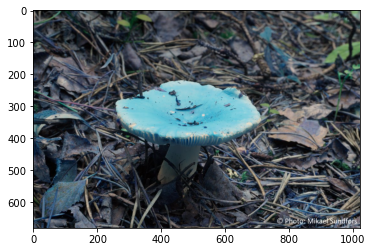

In [2]:
import pathlib
myFile = 'shroomEPImages'
data_dir = os.path.abspath("./" + myFile) 
print(data_dir)

categories = ['edible', 'poisonous']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show
        break
    break
    print(img_array)

In [3]:
batch_size = 32
img_height = 180
img_width = 180

import pathlib
myFile = 'shroomEPImages'
data_dir = os.path.abspath("./" + myFile) # or similar, depending on your scenario

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 413 files belonging to 2 classes.
Using 331 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 413 files belonging to 2 classes.
Using 82 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['edible', 'poisonous']


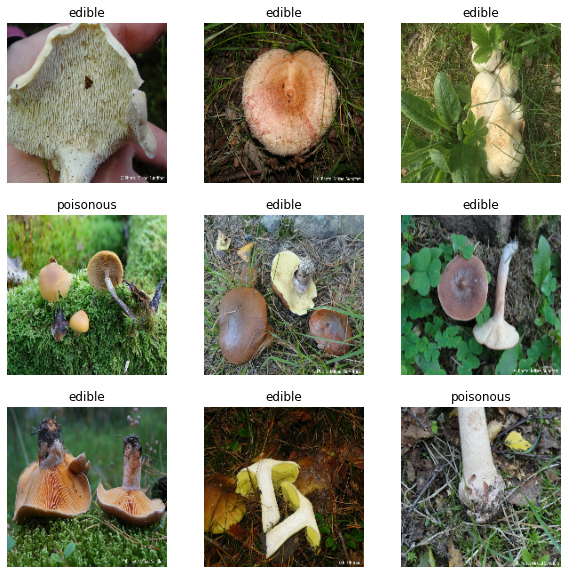

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


# Configuring the dataset for performance:

Using Dataset.cache() we can keep images in memor after they have been loaded during the first epoch.
Keeping the images in memory ensures there is no bottleneck when training the model.

Using Dataset.prefetch() overlaps data preprocessing and model execution while training

In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Creating the model:

In [9]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compile the model:

Currently using adam optimiser

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [12]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
11/11 [==============================] - 11s 717ms/step - loss: 0.9511 - accuracy: 0.5850 - val_loss: 0.6268 - val_accuracy: 0.6707
Epoch 2/10
11/11 [==============================] - 7s 623ms/step - loss: 0.5921 - accuracy: 0.7238 - val_loss: 0.6246 - val_accuracy: 0.6707
Epoch 3/10
11/11 [==============================] - 7s 618ms/step - loss: 0.6123 - accuracy: 0.6938 - val_loss: 0.6712 - val_accuracy: 0.6707
Epoch 4/10
11/11 [==============================] - 7s 661ms/step - loss: 0.5608 - accuracy: 0.7268 - val_loss: 0.6233 - val_accuracy: 0.6829
Epoch 5/10
11/11 [==============================] - 7s 668ms/step - loss: 0.5185 - accuracy: 0.7739 - val_loss: 0.6125 - val_accuracy: 0.6951
Epoch 6/10
11/11 [==============================] - 9s 855ms/step - loss: 0.4842 - accuracy: 0.7823 - val_loss: 0.7076 - val_accuracy: 0.6951
Epoch 7/10
11/11 [==============================] - 8s 725ms/step - loss: 0.3605 - accuracy: 0.8319 - val_loss: 0.6056 - val_accuracy: 0.6951
Epoch

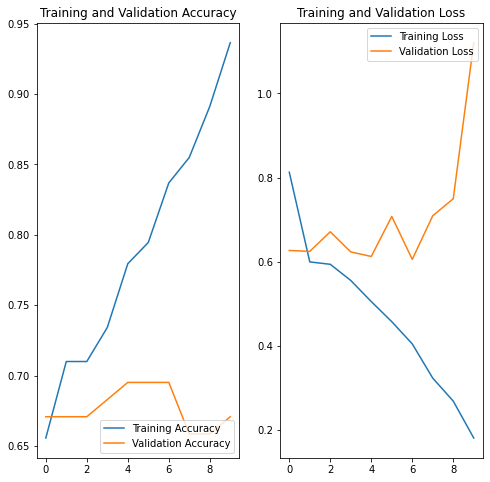

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

predict on new data:

In [17]:
mushroom_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCNEyMK_tgLK3bF-zKcHG5loKontPWeNhLcA&usqp=CAU"
mushroom_path = tf.keras.utils.get_file('test_shroom', origin =mushroom_url)

img = keras.preprocessing.image.load_img(
    mushroom_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to edible with a 88.06 percent confidence.


# Iterative development techniques:

Validation stalls in between 60-70%, which is a sign of overfitting, this is likely due to the small number of training samples.

One way to artificially increase the number of training samples is to generate more augmented versions of the existing mushroom photos.

In [18]:
data_augmentation = keras.Sequential(
[
 layers.experimental.preprocessing.RandomFlip("horizontal",
                                             input_shape=(img_height,
                                                         img_width,
                                                         3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
]
)

Visualise the augmented examples:

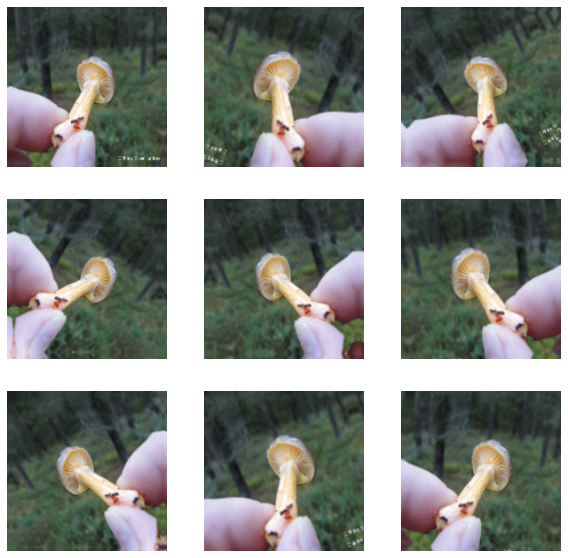

In [19]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

another technique to reduce overfitting is by using a form of regularisation known as Dropout.
Dropout randomly sets the activation number of output units from the layer to 0 during the training process.

In [20]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

Compiling altered model:

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [23]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
11/11 [==============================] - 10s 787ms/step - loss: 1.1888 - accuracy: 0.4785 - val_loss: 0.6685 - val_accuracy: 0.6707
Epoch 2/15
11/11 [==============================] - 8s 736ms/step - loss: 0.6351 - accuracy: 0.7371 - val_loss: 0.6311 - val_accuracy: 0.6707
Epoch 3/15
11/11 [==============================] - 9s 783ms/step - loss: 0.6251 - accuracy: 0.6924 - val_loss: 0.6908 - val_accuracy: 0.6707
Epoch 4/15
11/11 [==============================] - 8s 740ms/step - loss: 0.6080 - accuracy: 0.7126 - val_loss: 0.6284 - val_accuracy: 0.6707
Epoch 5/15
11/11 [==============================] - 9s 803ms/step - loss: 0.6082 - accuracy: 0.6921 - val_loss: 0.6299 - val_accuracy: 0.6707
Epoch 6/15
11/11 [==============================] - 8s 712ms/step - loss: 0.5708 - accuracy: 0.7238 - val_loss: 0.6407 - val_accuracy: 0.6707
Epoch 7/15
11/11 [==============================] - 8s 718ms/step - loss: 0.5588 - accuracy: 0.7340 - val_loss: 0.6857 - val_accuracy: 0.6707
Epoch

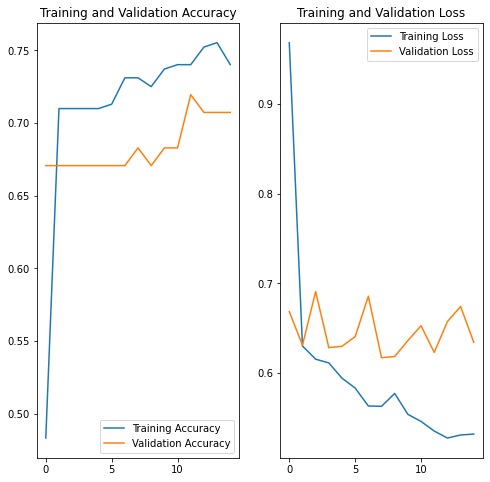

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [25]:
mushroom_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCNEyMK_tgLK3bF-zKcHG5loKontPWeNhLcA&usqp=CAU"
mushroom_path = tf.keras.utils.get_file('test_shroom', origin =mushroom_url)

img = keras.preprocessing.image.load_img(
    mushroom_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
) 

This image most likely belongs to edible with a 61.24 percent confidence.
